In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

file_path = "C:\\Users\\User\\Downloads\\diabetes_binary_health_indicators_BRFSS2021.csv"
diabetes_data = pd.read_csv(file_path)

diabetes_data.head()

print("Veri setinin boyutları:", diabetes_data.shape)

print("\nSütunlardaki eksik değer sayıları:")
missing_values = diabetes_data.isnull().sum()
print(missing_values)

print("\nSütunların veri tipleri:")
print(diabetes_data.dtypes)


Veri setinin boyutları: (236378, 22)

Sütunlardaki eksik değer sayıları:
Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64

Sütunların veri tipleri:
Diabetes_binary         float64
HighBP                    int64
HighChol                float64
CholCheck                 int64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity              int64
Fruits                    in

In [2]:
diabetes_data.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0,1.0,1,15.0,1.0,0.0,0.0,0,1,...,1,0.0,5.0,10.0,20.0,0.0,0,11,4.0,5.0
1,1.0,1,0.0,1,28.0,0.0,0.0,1.0,0,1,...,1,0.0,2.0,0.0,0.0,0.0,0,11,4.0,3.0
2,1.0,1,1.0,1,33.0,0.0,0.0,0.0,1,1,...,1,0.0,2.0,10.0,0.0,0.0,0,9,4.0,7.0
3,1.0,0,1.0,1,29.0,0.0,1.0,1.0,1,1,...,1,0.0,5.0,0.0,30.0,1.0,1,12,3.0,4.0
4,0.0,0,0.0,1,24.0,1.0,0.0,0.0,0,0,...,1,0.0,3.0,0.0,0.0,1.0,1,13,5.0,6.0


In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

print("Temel İstatistikler:\n", diabetes_data.describe())

Temel İstatistikler:
        Diabetes_binary         HighBP       HighChol      CholCheck  \
count    236378.000000  236378.000000  236378.000000  236378.000000   
mean          0.142010       0.418558       0.402059       0.963347   
std           0.349061       0.493324       0.490315       0.187909   
min           0.000000       0.000000       0.000000       0.000000   
25%           0.000000       0.000000       0.000000       1.000000   
50%           0.000000       0.000000       0.000000       1.000000   
75%           0.000000       1.000000       1.000000       1.000000   
max           1.000000       1.000000       1.000000       1.000000   

                 BMI         Smoker         Stroke  HeartDiseaseorAttack  \
count  236378.000000  236378.000000  236378.000000         236378.000000   
mean       28.953579       0.411997       0.038900              0.086548   
std         6.552055       0.492196       0.193356              0.281172   
min        12.000000       0.00000

In [4]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

X = diabetes_data.drop('Diabetes_binary', axis=1)
y = diabetes_data['Diabetes_binary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

ada_clf = AdaBoostClassifier(random_state=42)

ada_clf.fit(X_train, y_train)

y_pred = ada_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(accuracy)

print(report)


0.8618185407676905
              precision    recall  f1-score   support

         0.0       0.88      0.98      0.92     60861
         1.0       0.54      0.17      0.26     10053

    accuracy                           0.86     70914
   macro avg       0.71      0.57      0.59     70914
weighted avg       0.83      0.86      0.83     70914



In [5]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

ada_clf = AdaBoostClassifier(base_estimator=DecisionTreeClassifier())

param_grid = {
    'base_estimator__max_depth': [1, 2, 3],
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 1]
}

grid_search = GridSearchCV(ada_clf, param_grid, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

best_parameters = grid_search.best_params_
best_score = grid_search.best_score_

print("En İyi Parametreler:", best_parameters)
print("En İyi Skor:", best_score)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-p

En İyi Parametreler: {'base_estimator__max_depth': 3, 'learning_rate': 0.1, 'n_estimators': 200}
En İyi Skor: 0.8634929675282828


In [6]:
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

best_ada_clf = grid_search.best_estimator_
best_ada_clf.fit(X_train, y_train)

y_pred = best_ada_clf.predict(X_test)

print("Doğruluk (Accuracy):", accuracy_score(y_test, y_pred))
print("Sınıflandırma Raporu:\n", classification_report(y_test, y_pred))


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Doğruluk (Accuracy): 0.8630453789096653
Sınıflandırma Raporu:
               precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     60861
         1.0       0.56      0.15      0.24     10053

    accuracy                           0.86     70914
   macro avg       0.72      0.57      0.58     70914
weighted avg       0.83      0.86      0.83     70914



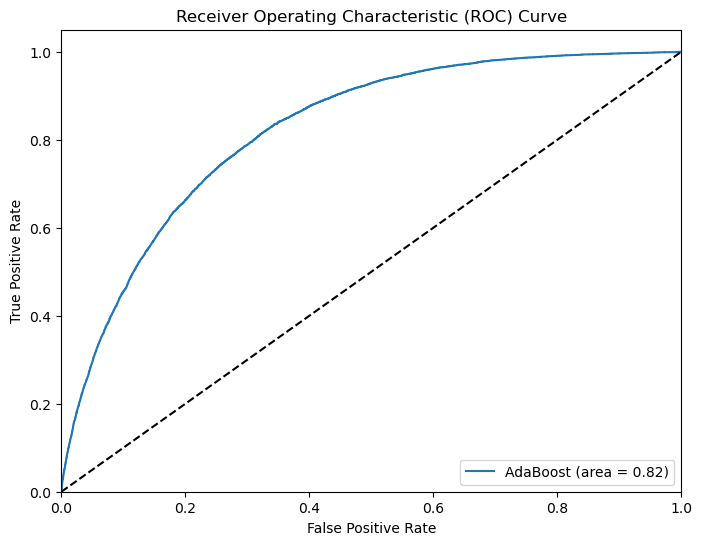

In [8]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

y_pred_proba = best_ada_clf.predict_proba(X_test)[:, 1]


fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

auc_score = roc_auc_score(y_test, y_pred_proba)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='AdaBoost (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], 'k--')  
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
